In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

names = pd.read_csv('/content/drive/MyDrive/80Items_names/80Items_Names_For_WordEmbeddings.csv')
names.head()

,PT_OrigName,EN_OrigName,EN_Best,EN_Other
0,abre_caricas,bottle_opener,bottle_opener,bottle_opener
1,afia-lapis,pencil_sharpener,pencil_sharpener,pencil_sharpener
2,agrafador,stapler,stapler,stapler
3,agulha,needle,sewing_needle,needle
4,alicate,pliers,pliers,pliers


In [7]:
from scipy.stats import zscore

def RDM(resp):
  """Compute the representational dissimilarity matrix (RDM)
  Args:
    resp (ndarray): S x N matrix with population responses to
      each stimulus in each row
  Returns:
    ndarray: S x S representational dissimilarity matrix
  """

  # z-score responses to each stimulus
  zresp = zscore(resp, axis=1)

  # Compute RDM
  RDM = 1 - (zresp @ zresp.T) / zresp.shape[1]

  return RDM

In [8]:
!pip install bert_embedding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 105.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 KB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259930 sha256=0e87f89ced1935a2fed2922731d881a7477daac2dee22689b7b432eece58e554
  Stored in directory: /root/.cache/pip/wheels/75/d0/a1/57ea55532e4ff6e3efbec7a851724a8f7a5b073ff648dd4160
  Created wheel for numpy: filename=numpy-1.14.6-cp38-cp38-linux_x86_64.whl size=9740476 sha256=0c85dd3850c138f146e776713b388fc7fc12b00c68e39ef656bbb2cb5ab8dcbd
  Stored in directory: /root/.cache/pip/wheels/77/81/aa/e309a6725c1cb6f5b37c3c67b74828fd4db0827592ff4a4f85
Successfully built gluonnlp numpy
  Attempting 

In [9]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 98.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.24.1 whi

In [10]:
!pip install torchvision 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import bert_embedding
from bert_embedding import BertEmbedding
bert_embedding=BertEmbedding()

Vocab file is not found. Downloading.


In [12]:
from transformers import BertModel, BertTokenizer
model_name = 'bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(model_name)
# load
model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

DisBertLHS_best = np.empty([len(names['EN_Best']), len(names['EN_Best'])])
DisBertP_best = np.empty([len(names['EN_Best']), len(names['EN_Best'])])

i = j = 0
for e1 in names['EN_Best']:
  for e2 in names['EN_Best']: 
      obj1 = tokenizer.encode(e1.replace("_", ""), add_special_tokens=False)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] 
        lhs1 = lhs1.mean(1)
        lhs1_p = model(obj1)[1]

      obj2 = tokenizer.encode(e2.replace("_", ""), add_special_tokens=False)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] 
        lhs2 = lhs2.mean(1)
        lhs2_p = model(obj2)[1]
        
      DisBertLHS_best[i, j] = 1 - cosine_similarity(lhs1,lhs2)
      DisBertP_best[i, j] = 1 - cosine_similarity(lhs1_p,lhs2_p)
      j += 1
  j = 0
  i += 1

In [14]:
lofEngs = []
for e in names['EN_Best']:
    obj = tokenizer.encode(e.replace("_", ""), add_special_tokens=False)
    tokens = tokenizer.tokenize(e.replace("_", ""))
    lofEngs.append(tokens)
    print('Tokens of ', e, ' = ', tokens, ', and encoded tokens are: ',obj)

Tokens of  bottle_opener  =  ['bottle', '##open', '##er'] , and encoded tokens are:  [5835, 26915, 2121]
Tokens of  pencil_sharpener  =  ['pencil', '##sha', '##rp', '##ener'] , and encoded tokens are:  [14745, 7377, 14536, 24454]
Tokens of  stapler  =  ['staple', '##r'] , and encoded tokens are:  [18785, 2099]
Tokens of  sewing_needle  =  ['sewing', '##nee', '##dle'] , and encoded tokens are:  [22746, 24045, 10362]
Tokens of  pliers  =  ['pl', '##iers'] , and encoded tokens are:  [20228, 10136]
Tokens of  board_eraser  =  ['board', '##eras', '##er'] , and encoded tokens are:  [2604, 24140, 2121]
Tokens of  whistle  =  ['whistle'] , and encoded tokens are:  [13300]
Tokens of  bucket  =  ['bucket'] , and encoded tokens are:  [13610]
Tokens of  whisk  =  ['w', '##his', '##k'] , and encoded tokens are:  [1059, 24158, 2243]
Tokens of  electric_drill  =  ['electric', '##dr', '##ill'] , and encoded tokens are:  [3751, 13626, 8591]
Tokens of  rubber_ring  =  ['rubber', '##ring'] , and encoded 

In [15]:
Eng_token = names[['EN_Best']].copy()
Eng_token['tokenized'] = lofEngs 
   
# saving the dataframe 
Eng_token.to_csv('EN_Best_tokens.csv')

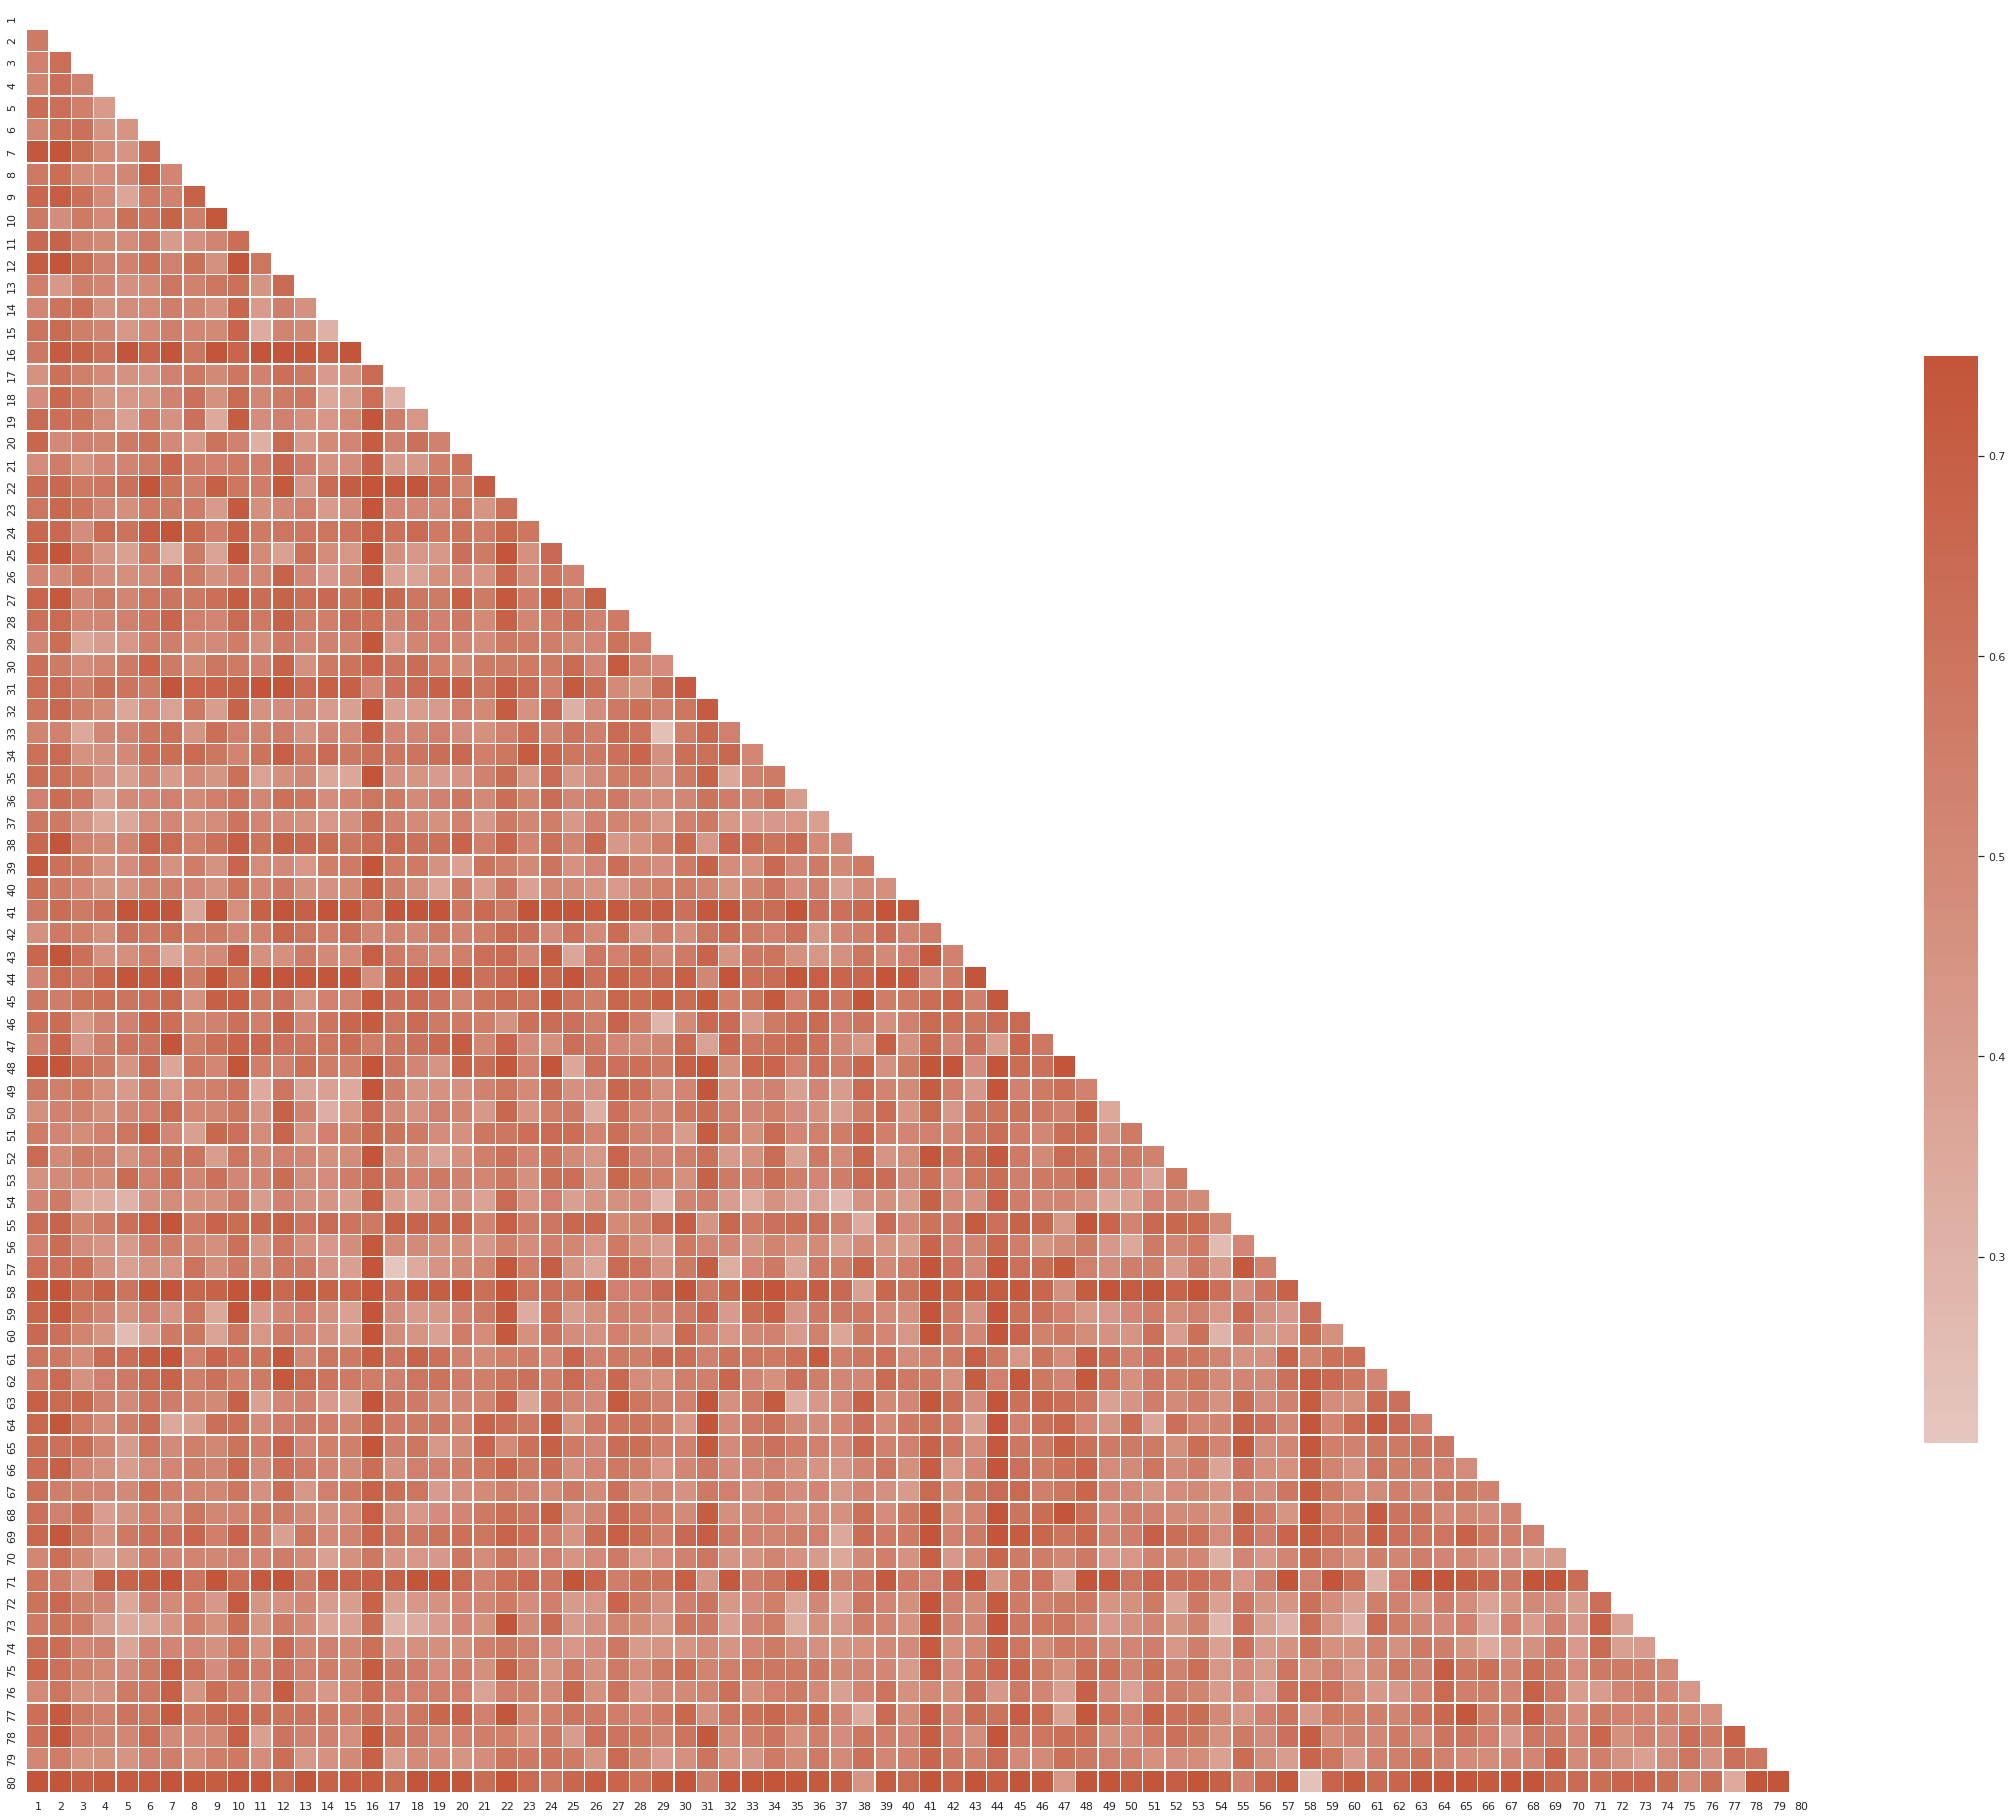

In [16]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = pd.DataFrame(data=DisBertLHS_best,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

# Save
d.to_csv('./DisBertLHS_RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

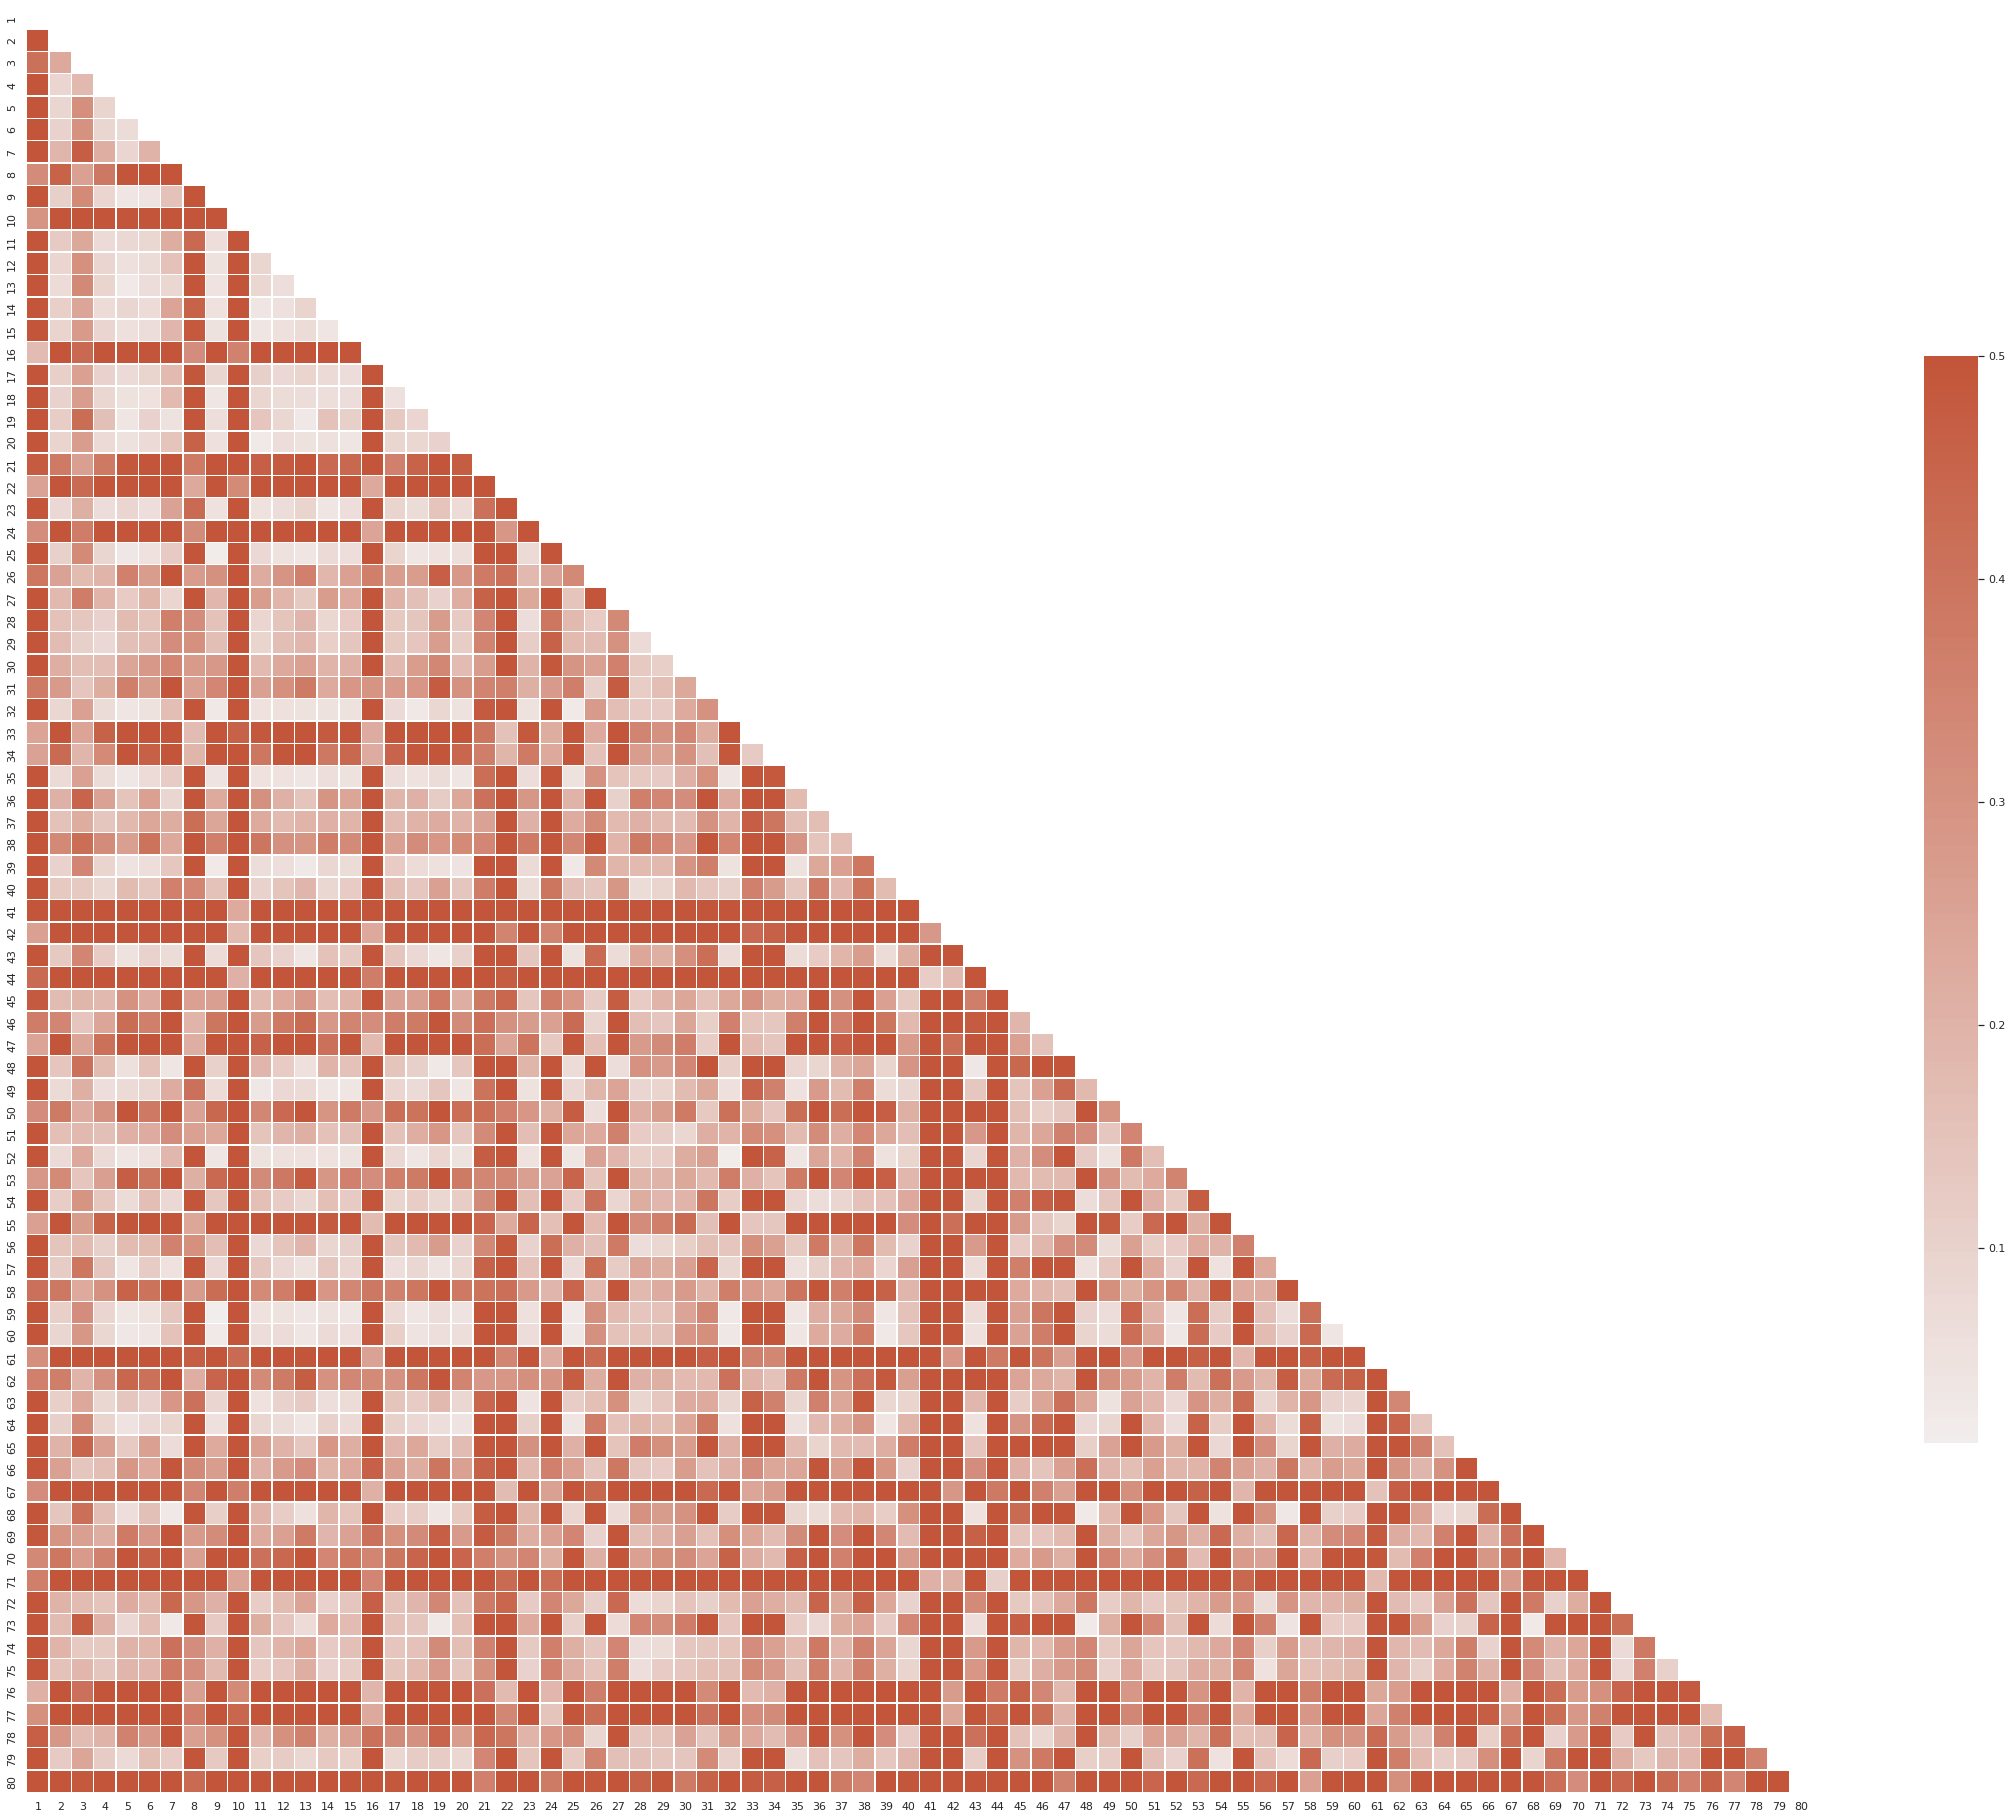

In [17]:
sns.set_theme(style="white")

d = pd.DataFrame(data=DisBertP_best,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

# Save
d.to_csv('./DisBertP_RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
DisBertLHS_best.shape

(80, 80)

In [19]:
DisBertP_best.shape

(80, 80)

In [20]:
DisBertLHS_other = np.empty([len(names['EN_Other']), len(names['EN_Other'])])
DisBertP_other = np.empty([len(names['EN_Other']), len(names['EN_Other'])])

i = j = 0
for e1 in names['EN_Other']:
  for e2 in names['EN_Other']: 
      obj1 = tokenizer.encode(e1.replace("_", ""), add_special_tokens=False)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] 
        lhs1 = lhs1.mean(1)
        lhs1_p = model(obj1)[1]

      obj2 = tokenizer.encode(e2.replace("_", ""), add_special_tokens=False)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] 
        lhs2 = lhs2.mean(1)
        lhs2_p = model(obj2)[1]
        
      DisBertLHS_other[i, j] = 1 - cosine_similarity(lhs1,lhs2)
      DisBertP_other[i, j] = 1 - cosine_similarity(lhs1_p,lhs2_p)
      j += 1
  j = 0
  i += 1

In [21]:
lofOthers = []
for e in names['EN_Other']:
    obj = tokenizer.encode(e.replace("_", ""), add_special_tokens=False)
    tokens = tokenizer.tokenize(e.replace("_", ""))
    lofOthers.append(tokens)
    print('Tokens of ', e, ' = ', tokens, ', and encoded tokens are: ',obj)



Tokens of  bottle_opener  =  ['bottle', '##open', '##er'] , and encoded tokens are:  [5835, 26915, 2121]
Tokens of  pencil_sharpener  =  ['pencil', '##sha', '##rp', '##ener'] , and encoded tokens are:  [14745, 7377, 14536, 24454]
Tokens of  stapler  =  ['staple', '##r'] , and encoded tokens are:  [18785, 2099]
Tokens of  needle  =  ['needle'] , and encoded tokens are:  [12201]
Tokens of  pliers  =  ['pl', '##iers'] , and encoded tokens are:  [20228, 10136]
Tokens of  board_eraser  =  ['board', '##eras', '##er'] , and encoded tokens are:  [2604, 24140, 2121]
Tokens of  whistle  =  ['whistle'] , and encoded tokens are:  [13300]
Tokens of  bucket  =  ['bucket'] , and encoded tokens are:  [13610]
Tokens of  whisk  =  ['w', '##his', '##k'] , and encoded tokens are:  [1059, 24158, 2243]
Tokens of  power_drill  =  ['power', '##dr', '##ill'] , and encoded tokens are:  [2373, 13626, 8591]
Tokens of  rubber_ring  =  ['rubber', '##ring'] , and encoded tokens are:  [8903, 4892]
Tokens of  basketba

In [22]:
Eng_other_token = names[['EN_Other']].copy()
Eng_other_token['tokenized'] = lofOthers 
   
# saving the dataframe 
Eng_other_token.to_csv('EN_Other_tokens.csv')

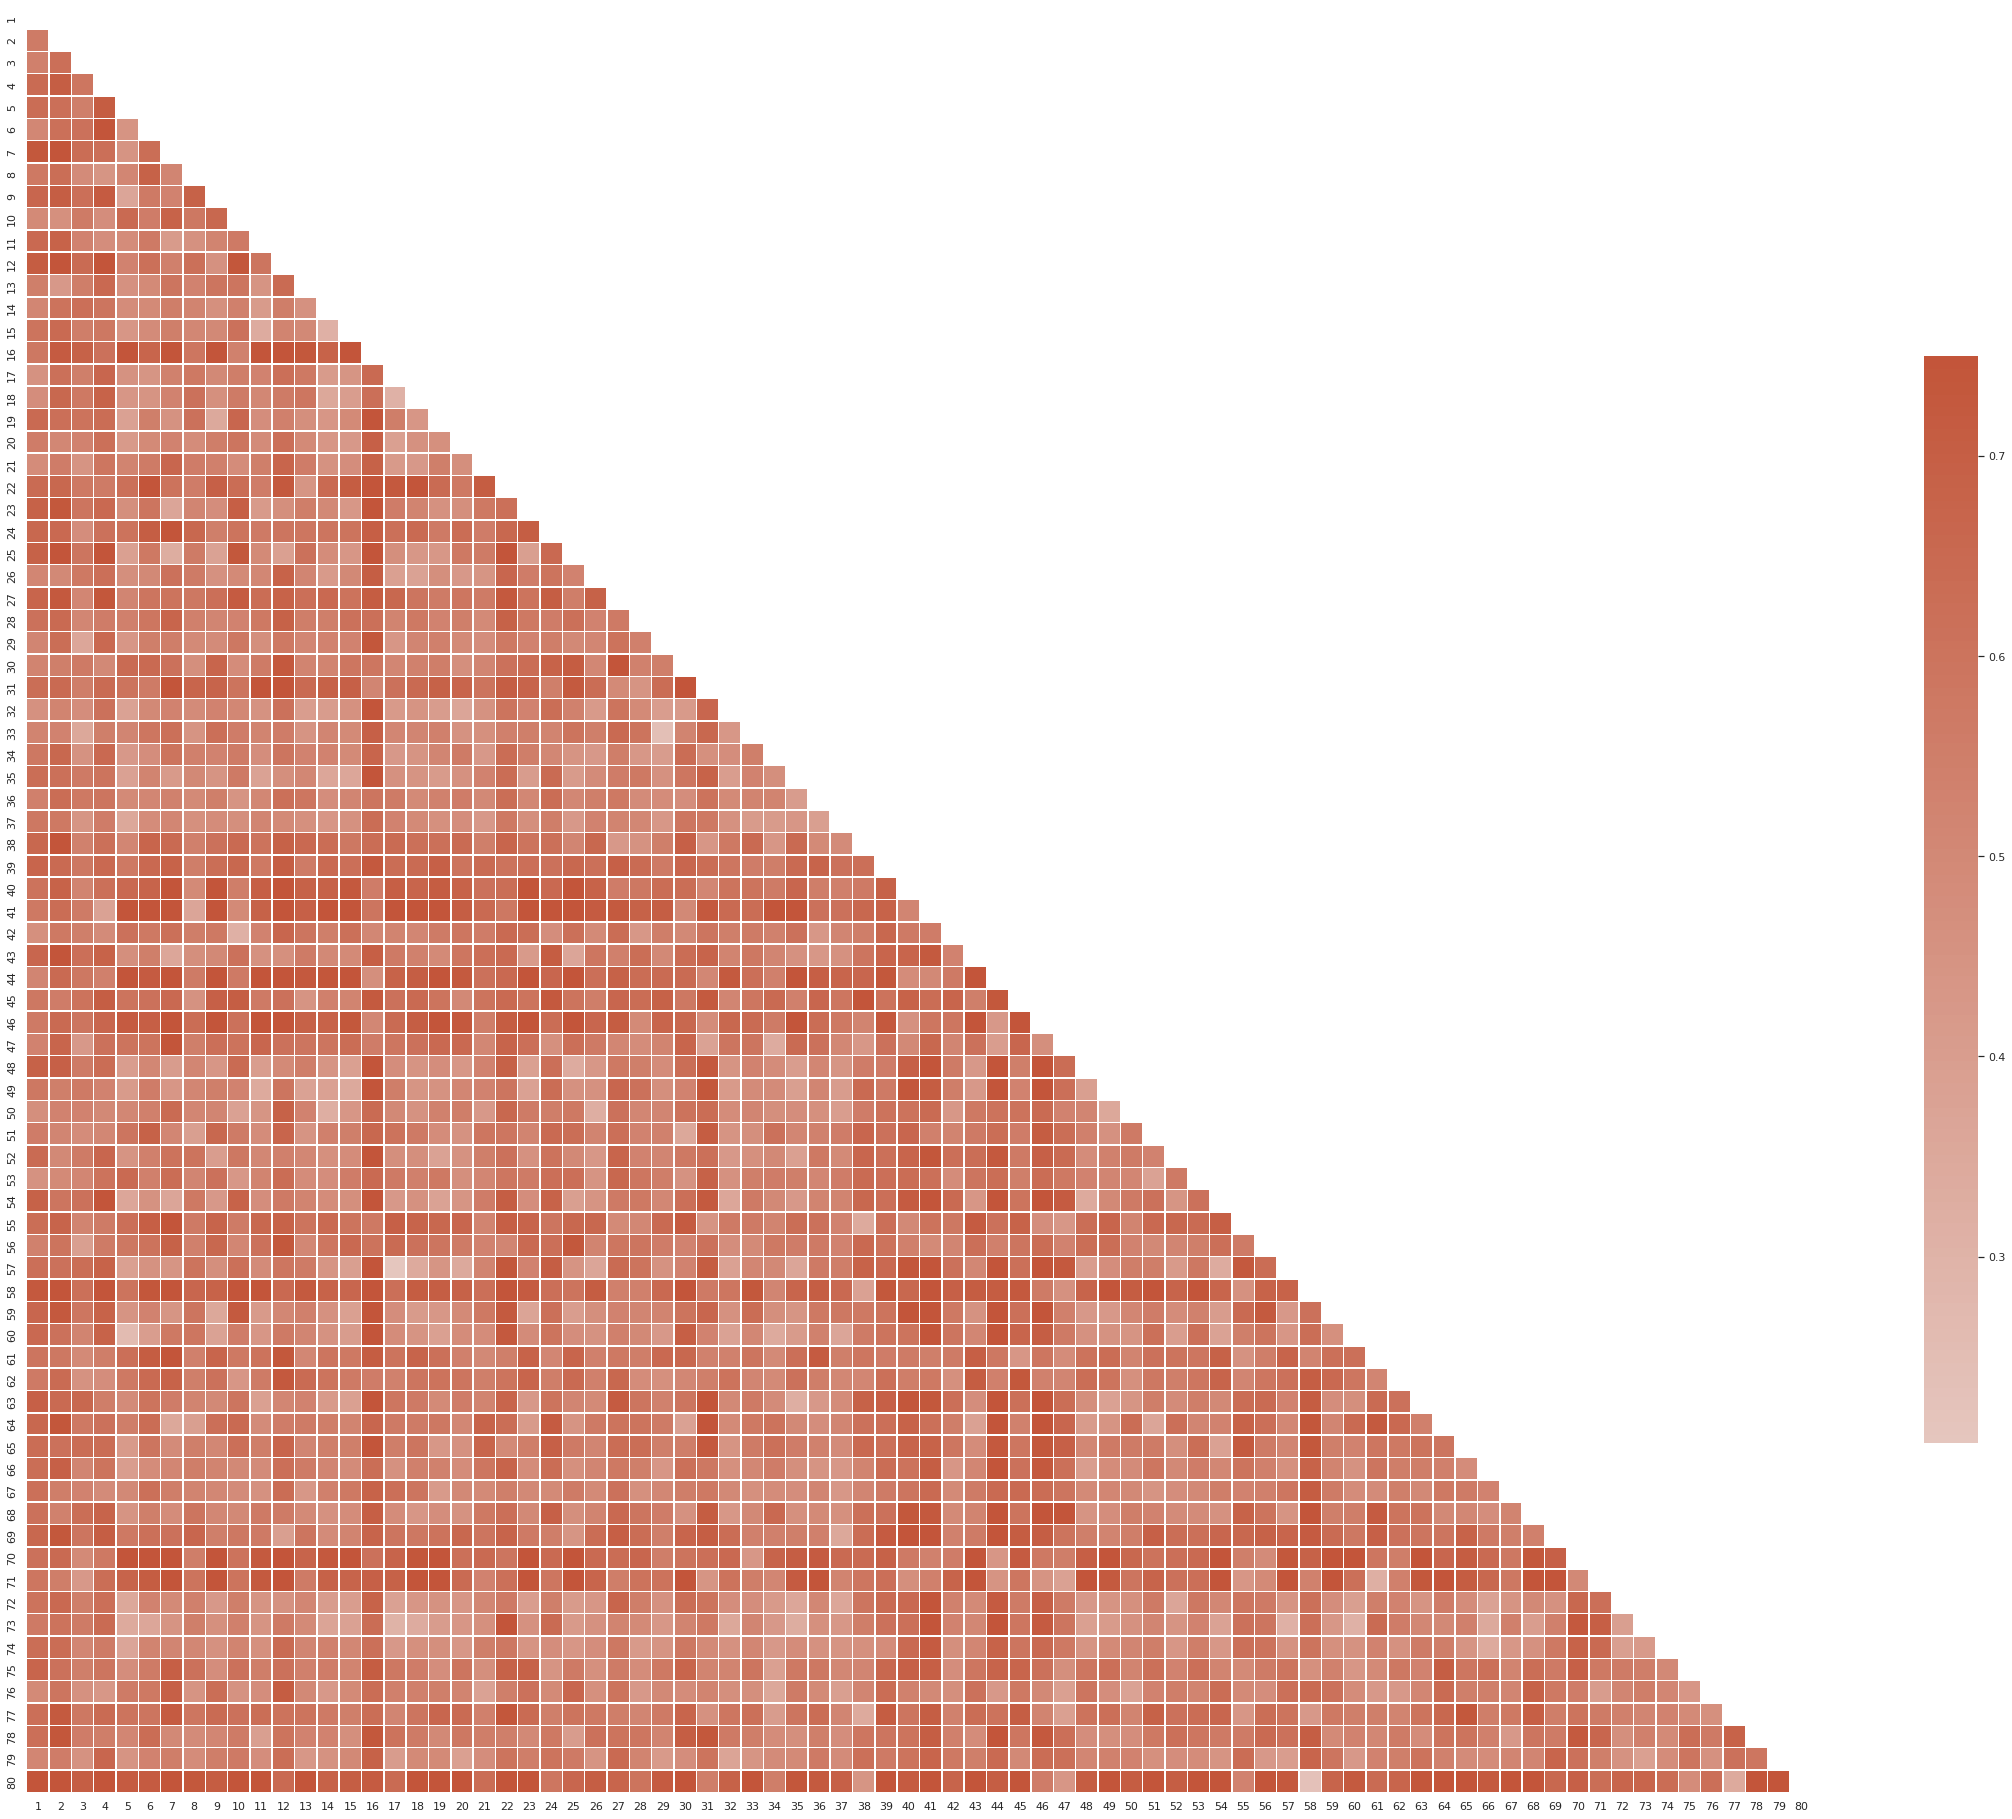

In [23]:
sns.set_theme(style="white")

d = pd.DataFrame(data=DisBertLHS_other,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

# Save
d.to_csv('./DisBertLHS_other_RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

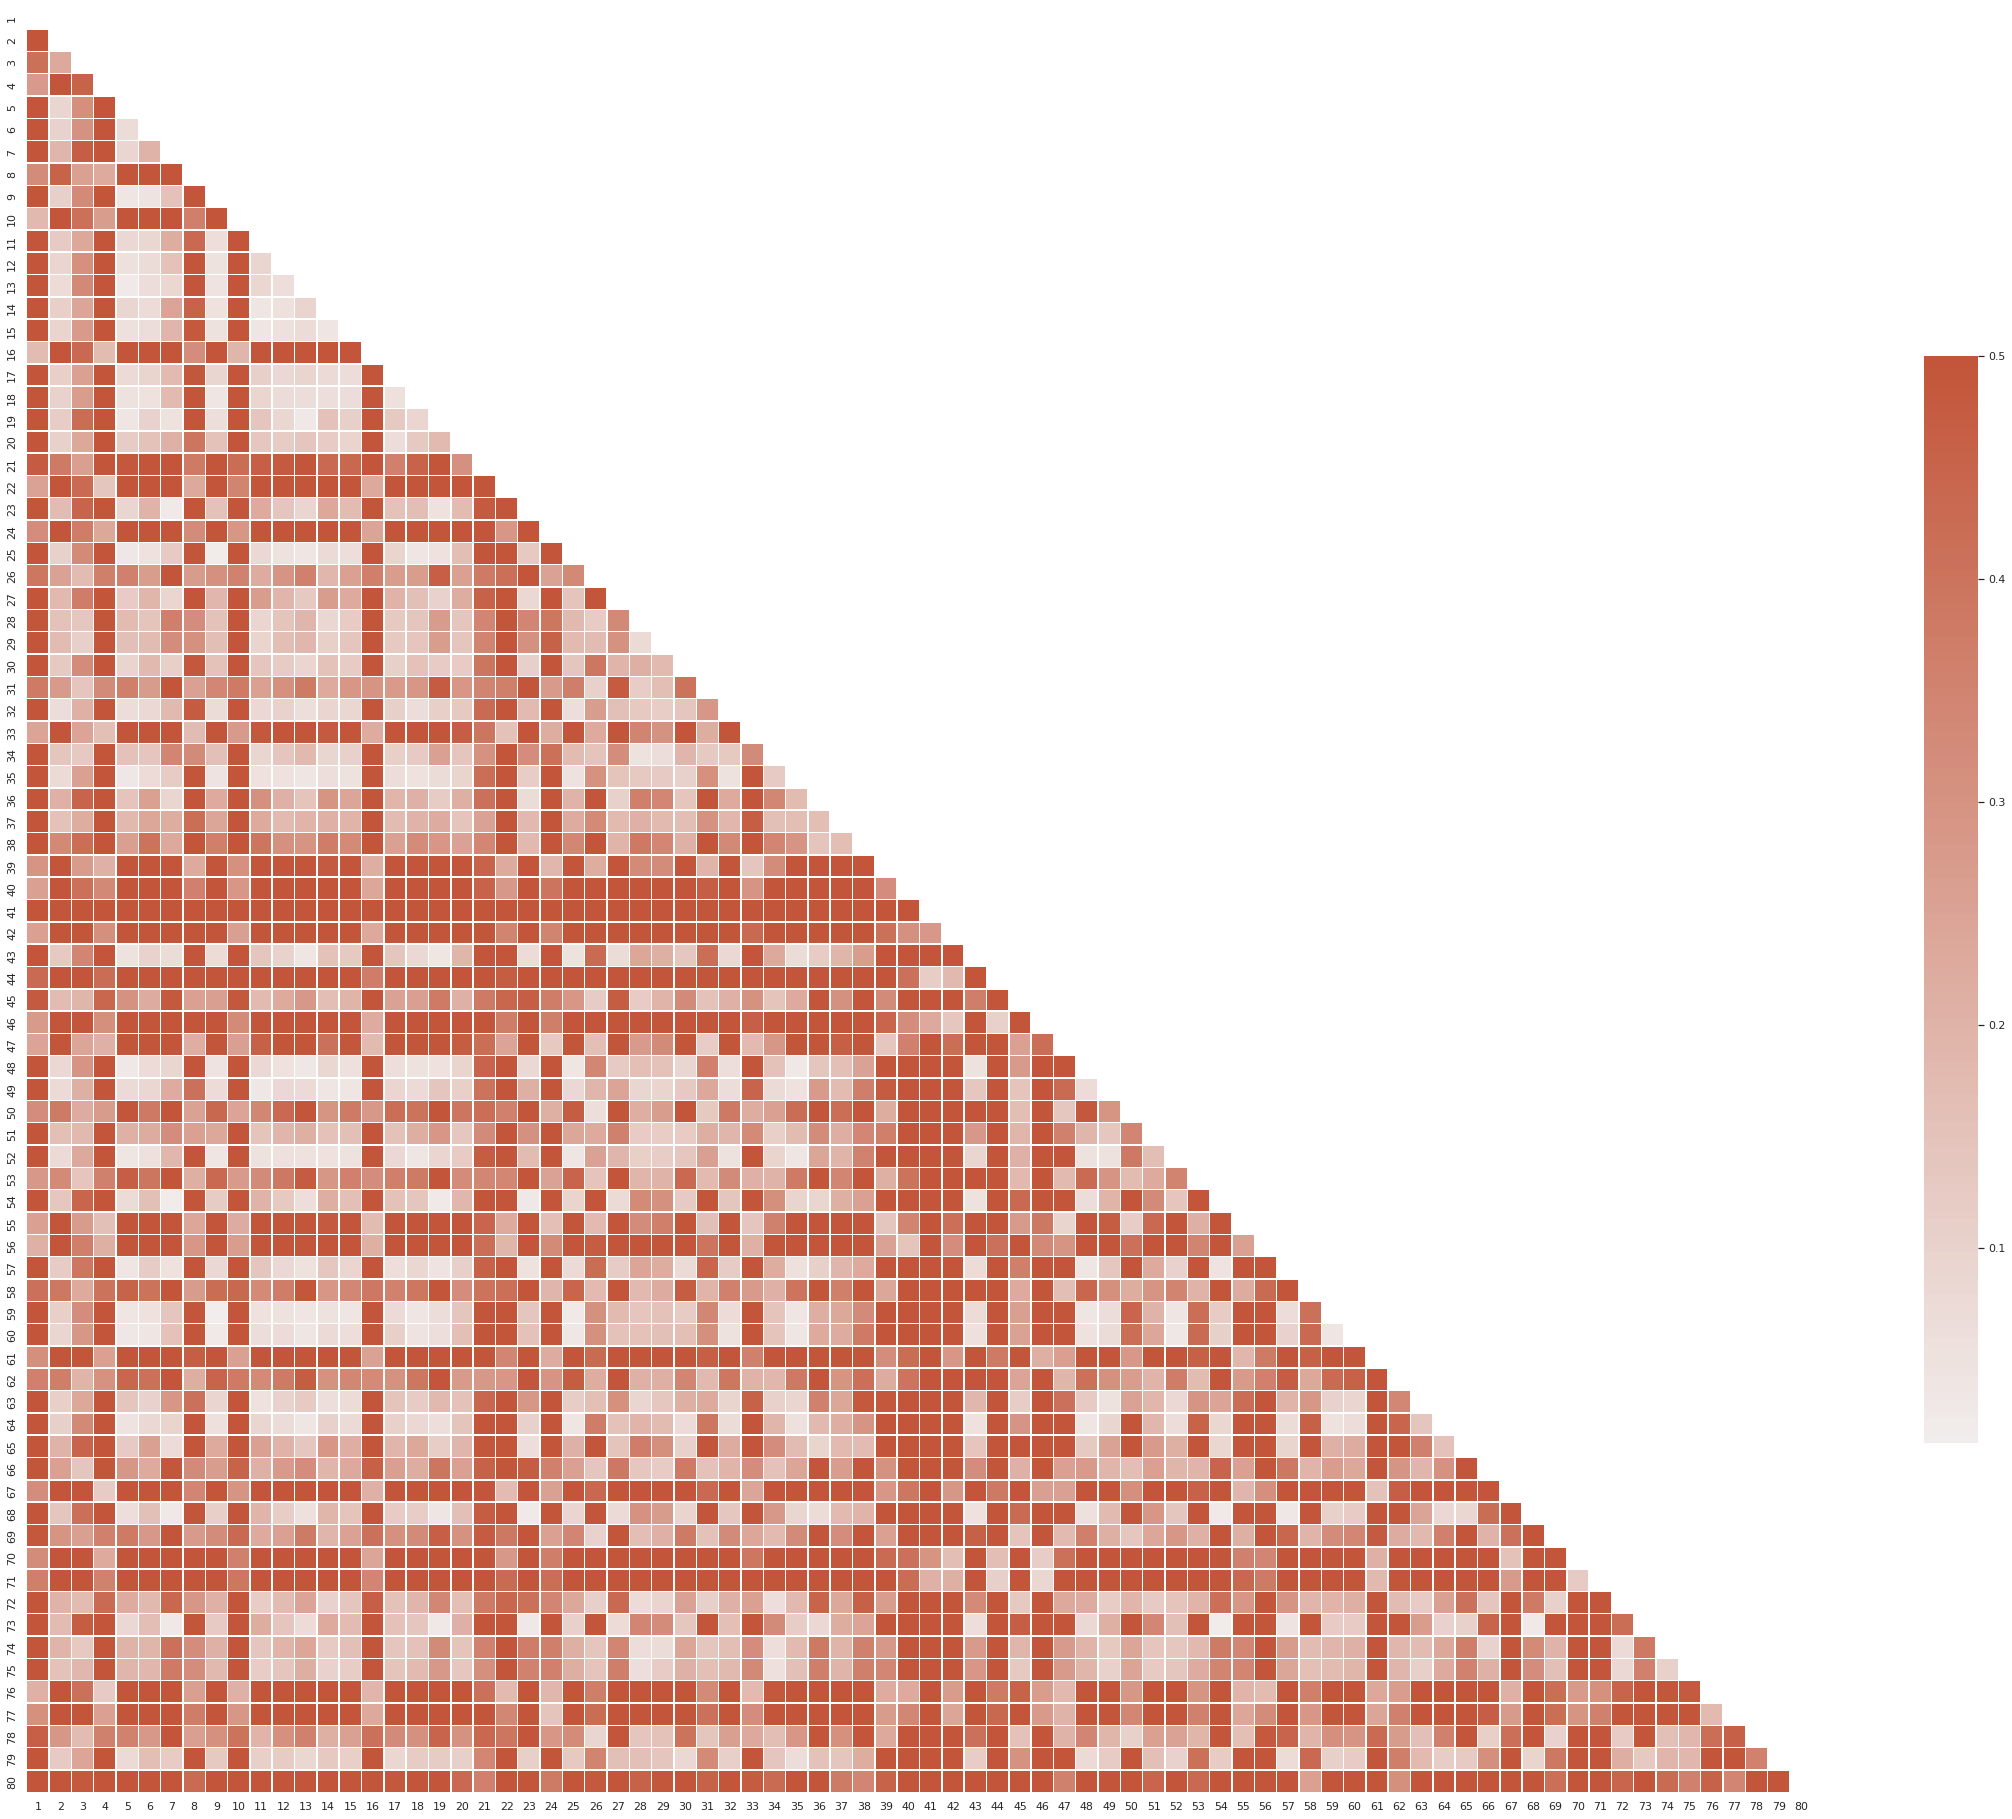

In [24]:
sns.set_theme(style="white")

d = pd.DataFrame(data=DisBertP_other,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

# Save
d.to_csv('./DisBertP_other_RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
DisBertLHS_other.shape

(80, 80)

In [26]:
DisBertP_other.shape

(80, 80)